# UMAP on sparse data

We follow these [notes](https://umap-learn.readthedocs.io/en/latest/sparse.html).

In [3]:
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
primes = list(sympy.primerange(2,110000))

In [9]:
prime_to_column = {p:i for i,p in enumerate(primes)}

Creating the data:

In [13]:
lil_matrix_rows = []
lil_matrix_data = []
for n in range(100000):
    prime_factors = sympy.primefactors(n)
    lil_matrix_rows.append([prime_to_column[p] for p in prime_factors])
    lil_matrix_data.append([1] * len(prime_factors))


factor_matrix = scipy.sparse.lil_matrix((len(lil_matrix_rows), len(primes)), dtype=np.float32)
factor_matrix.rows = np.array(lil_matrix_rows)
factor_matrix.data = np.array(lil_matrix_data)
factor_matrix

<100000x10453 sparse matrix of type '<class 'numpy.float32'>'
	with 266398 stored elements in List of Lists format>

Using the UMAP:

In [14]:
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(factor_matrix)

Plotting result:

<AxesSubplot:>

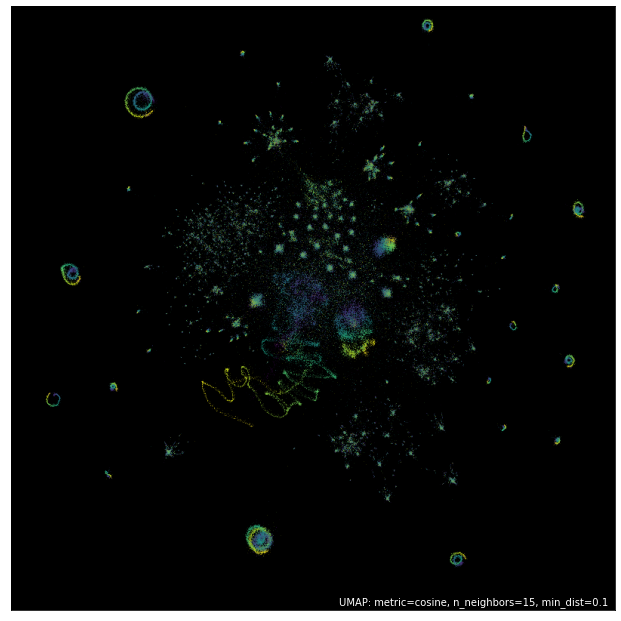

In [15]:
umap.plot.points(mapper, values=np.arange(100000), theme='viridis')